# 비비빅 학습동아리 10회차_스터디
 - 2024.8.27.(화) 18:30~20:30
 - 시각화, EDA

# 라이브러리 import

In [1]:
#판다스, 넘파이 (필수 라이브러리)
# python version 3.12.4
import pandas as pd
import numpy as np

#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

 -  시각화 라이브러리 장단점
    - matplotlib 파이썬 필수 시각화 라이브러리
      - 홈페이지: https://matplotlib.org/
      - 장점: 자유도 높음, 자유자재로 다룰 수 있으면 정말 좋다.
      - 단점: 코드가 다소 복잡
    - seaborn 좀 더 예쁜 시각화?!
      - 홈페이지: https://seaborn.pydata.org/index.html
      - 장점: 코드 쉬움, 정해진 스타일의 멋진 그래프를 그릴 수 있음
      - 단점: 정해진 레이아웃이 있음
    - plotly(dash) 
      - 홈페이지: https://plotly.com/python/
      - 장점: 파이썬 시각화 끝판왕, 인터랙티브한 그래프(움직이는), 웹 형식으로 배포도 가능
      - 단점:  코드가 어렵고 지저분함. 
    - pandas 내부에 구현된 matplotlib api 사용
      - 홈페이지: 
      - 장점: 간편함
      - 단점: 정해진 일부 레이아웃에 한해서만 사용 가능

# 데이터셋 불러오기

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 데이터 변환 (feature engineering)
  1. 가족 수 만들기 (SibSp, Parch)
  2. 성별(male, female), 0,1로 바꾸기
  3. age, Fare -> 구간화(cat) -> why? 시각화를 해 보고...
  4. Cabin  문자와 숫자로 분할 -> 코드를 복붙

## 1. 가족 수 만들기

In [3]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [4]:
# 혼자인지?
train['isAlone'] = train['Family'].apply(lambda x: 0 if x > 1 else 1)
# groupby 로 체크
train[['Family','isAlone']].T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Family,2,2,1,2,1,1,1,5,3,2,...,1,1,1,1,6,1,1,4,1,1
isAlone,0,0,1,0,1,1,1,0,0,0,...,1,1,1,1,0,1,1,0,1,1


## 2. 성별(male, female), 0,1로 바꾸기

In [5]:
train['sex_binary'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
## replace
#train['sex_binary'] = train['Sex'].replace({'male': 0, 'female': 1})
## map
#train['sex_binary'] = train['Sex'].map({'male': 0, 'female': 1})
## lambda
#train['sex_binary'] = train['Sex'].apply(lambda x: 0 if x == 'male' else 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,isAlone,sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0


## 4. Cabin 문자와 숫자로 분할

In [6]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
train[train['Cabin'] == 'B57 B59 B63 B66']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,isAlone,sex_binary
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,5,0,1
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,5,0,1


In [8]:
test[test['Cabin'] == 'B57 B59 B63 B66']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C


In [9]:
train[['Cabin_Letter', 'Cabin_Number']] = train['Cabin'].str.extract(r'([A-Za-z]+)(\d*)')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,isAlone,sex_binary,Cabin_Letter,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,0,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,1,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0,1,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0,C,148


In [10]:
train.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,isAlone,sex_binary,Cabin_Letter,Cabin_Number
Sex,,,,,,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312,314,314,314,97,97
male,577,577,577,577,453,577,577,577,577,107,577,577,577,577,107,107


In [11]:

train = train[['PassengerId', 
              'Survived', 
              'Pclass', 
              'Name', 
              'Sex', 
              'Age', 
              'SibSp',
              'Parch', 
              'Ticket', 
              'Fare', 
              'Cabin', 
              'Embarked', 
              'Family', 
              'isAlone', 
              'sex_binary',
              'Cabin_Letter', 
              'Cabin_Number'
              ]]

## 결과확인

In [12]:
train
# 891 rows × 17 columns 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,isAlone,sex_binary,Cabin_Letter,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,0,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,1,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,1,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,0,NaN,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,1,B,42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0,1,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0,C,148


# 시각화

- 범주형 변수의 시각화
   - 선실 등급별 인원수, 성별 인원수
   - 연령을 그룹별(10대, 20대, 30대~~)로 그룹핑한 후  
     ※ 그룹핑으로 숫자형 변수가 범주형(정확히는 연속형) 변수가 됨
     연령대별 인원수
   - Embarked(정박위치?)별 인원수

     ** (공통점) 범주형 변수 * 컬럼 수

     ** 범주형 변수 * 숫자형 변수 조합도 가능
   - 선실 등급별 Fare(요금) 평균, min, max, std.... 등등
   - 성별에 따른 요금
   - 연령대에 따른 요금 변화

     ** 파생변수를 통한 분석도 가능  
      -> SibSp + Parch 로 가족 수를 구할 수 있음

   - 성별에 따른 가족 수 SibSp + Parch    ※ 의미가 있을까? 아무튼
   - 연령대에 따른 가족 수
   - 가족 수에 따른 요금 변화. -> 가족 수 범위가 시각화로 보기 자연스러운 정도여야
   - Embarked에 따른 요금, 가족 수 등등등



### 선실 등급별 인원수

In [13]:
### colormap이라는것.
import matplotlib.cm as cm

In [14]:
col_cnt = train['Pclass'].value_counts().sort_index()
col_cnt.values, col_cnt.values.sum()

(array([216, 184, 491], dtype=int64), 891)

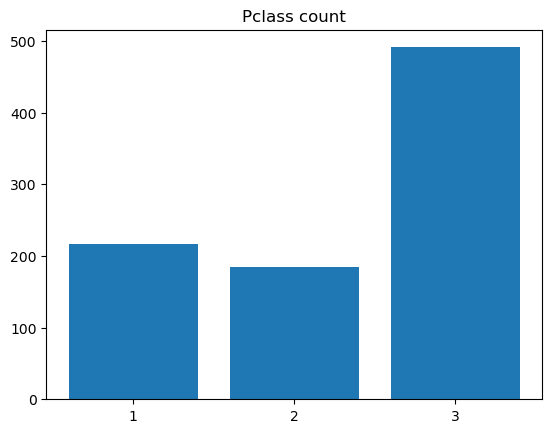

In [15]:
# 클래스별 막대차트
col_cnt = train['Pclass'].value_counts().sort_index()
col_cnt.index, col_cnt.values

# matplotlib 컨벤션
## 전체 틀인 fig와 ax로 구성
fig, ax = plt.subplots()

ax.bar(col_cnt.index, col_cnt.values)
ax.set_title('Pclass count')
ax.set_xticks([1,2,3])

plt.show()

<Axes: xlabel='Pclass'>

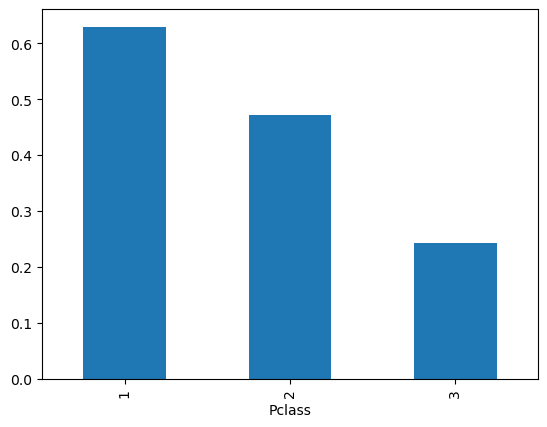

In [35]:
# pandas style
train.groupby('Pclass')['Survived'].mean().plot(kind='bar')

## 사망률을 비교하는 방법?
 1. 사망여부가 0, 1로 되어있으므로, 이 값들을 평균한다.  
   -> ex sum() 이 0.6이라면  
 2. 클래스별, 사망여부별로 barchart를 구성한다.  
   -> (대소비교를 정확하게 가능)  

In [16]:
train.groupby(['Pclass']).Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

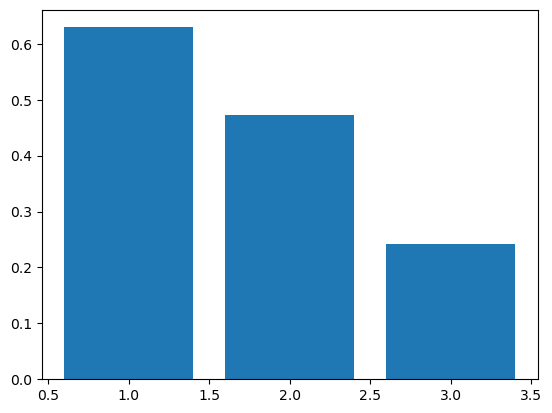

In [17]:
# 1
col_cnt = train.groupby(['Pclass']).Survived.mean()
fig, ax = plt.subplots()
ax.bar(x=col_cnt.index, height=col_cnt.values)
plt.show()

### pandaspandas의 group by
    - 자주 사용되는 집계 함수
    - mean: 평균값
    - sum: 합계
    - min: 최소값
    - max: 최대값
    - count: 갯수
    - std: 표준편차
    - var: 분산
    - median: 중앙값
    - first: 첫 번째 값
    - last: 마지막 값
    - nunique: 고유한 값의 수
    -> 엑셀 구버전에서 unique value 추출은 어렵다.

In [18]:
#groupby() 해보면 이런 식으로 나온다.
train.groupby(['Pclass','Survived']).describe()

PassengerId                                               \
                      count        mean         std   min     25%    50%   
Pclass Survived                                                            
1      0               80.0  410.300000  252.655587   7.0  174.00  437.0   
       1              136.0  491.772059  239.006988   2.0  307.75  510.5   
2      0               97.0  452.123711  257.771065  21.0  229.00  414.0   
       1               87.0  439.080460  244.211937  10.0  254.00  441.0   
3      0              372.0  453.580645  263.090509   1.0  206.75  470.0   
       1              119.0  394.058824  264.680245   3.0  169.50  359.0   

                                  Age             ... isAlone      sex_binary  \
                    75%    max  count       mean  ...     75%  max      count   
Pclass Survived                                   ...                           
1      0         608.75  873.0   64.0  43.695312  ...     1.0  1.0       80.0   
       1         693.50  890.0  122.0  35.368197  ...     1.0  1.0      136.0   
2      0         686.00  887.0   90.0  33.544444  ...     1.0  1.0       97.0   
       1         612.50  881.0   83.0  25.901566  ...     1.0  1.0       87.0   
3      0         679.50  891.0  270.0  26.555556  ...     1.0  1.0      372.0   
       1         633.50  876.0   85.0  20.646118  ...     1.0  1.0      119.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
Pclass Survived                                               
1      0         0.037500  0.191182  0.0  0.0  0.0  0.0  1.0  
       1         0.669118  0.472270  0.0  0.0  1.0  1.0  1.0  
2      0         0.061856  0.242145  0.0  0.0  0.0  0.0  1.0  
       1         0.804598  0.398809  0.0  1.0  1.0  1.0  1.0  
3      0         0.193548  0.395611  0.0  0.0  0.0  0.0  1.0  
       1         0.605042  0.490909  0.0  0.0  1.0  1.0  1.0  

[6 rows x 64 columns]

In [19]:
#groupby의 응용
col_cnt = train.groupby('Pclass').agg({'PassengerId':'count','Age':'mean'})
col_cnt

,PassengerId,Age
Pclass,,
1,216,38.233441
2,184,29.877630
3,491,25.140620


<Axes: xlabel='Pclass', ylabel='PassengerId'>

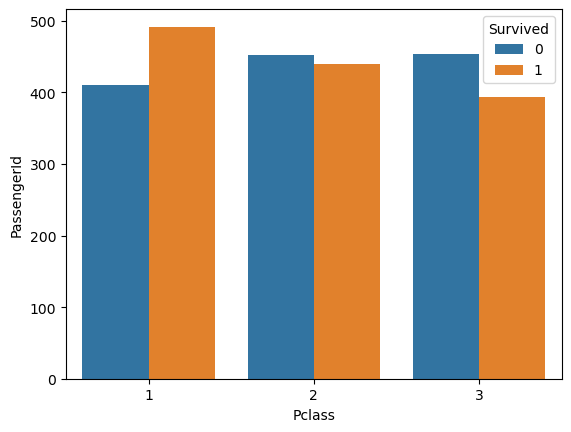

In [20]:
sns.barplot(data=train, x='Pclass', y='PassengerId', hue='Survived', errorbar=None)

## pariplot

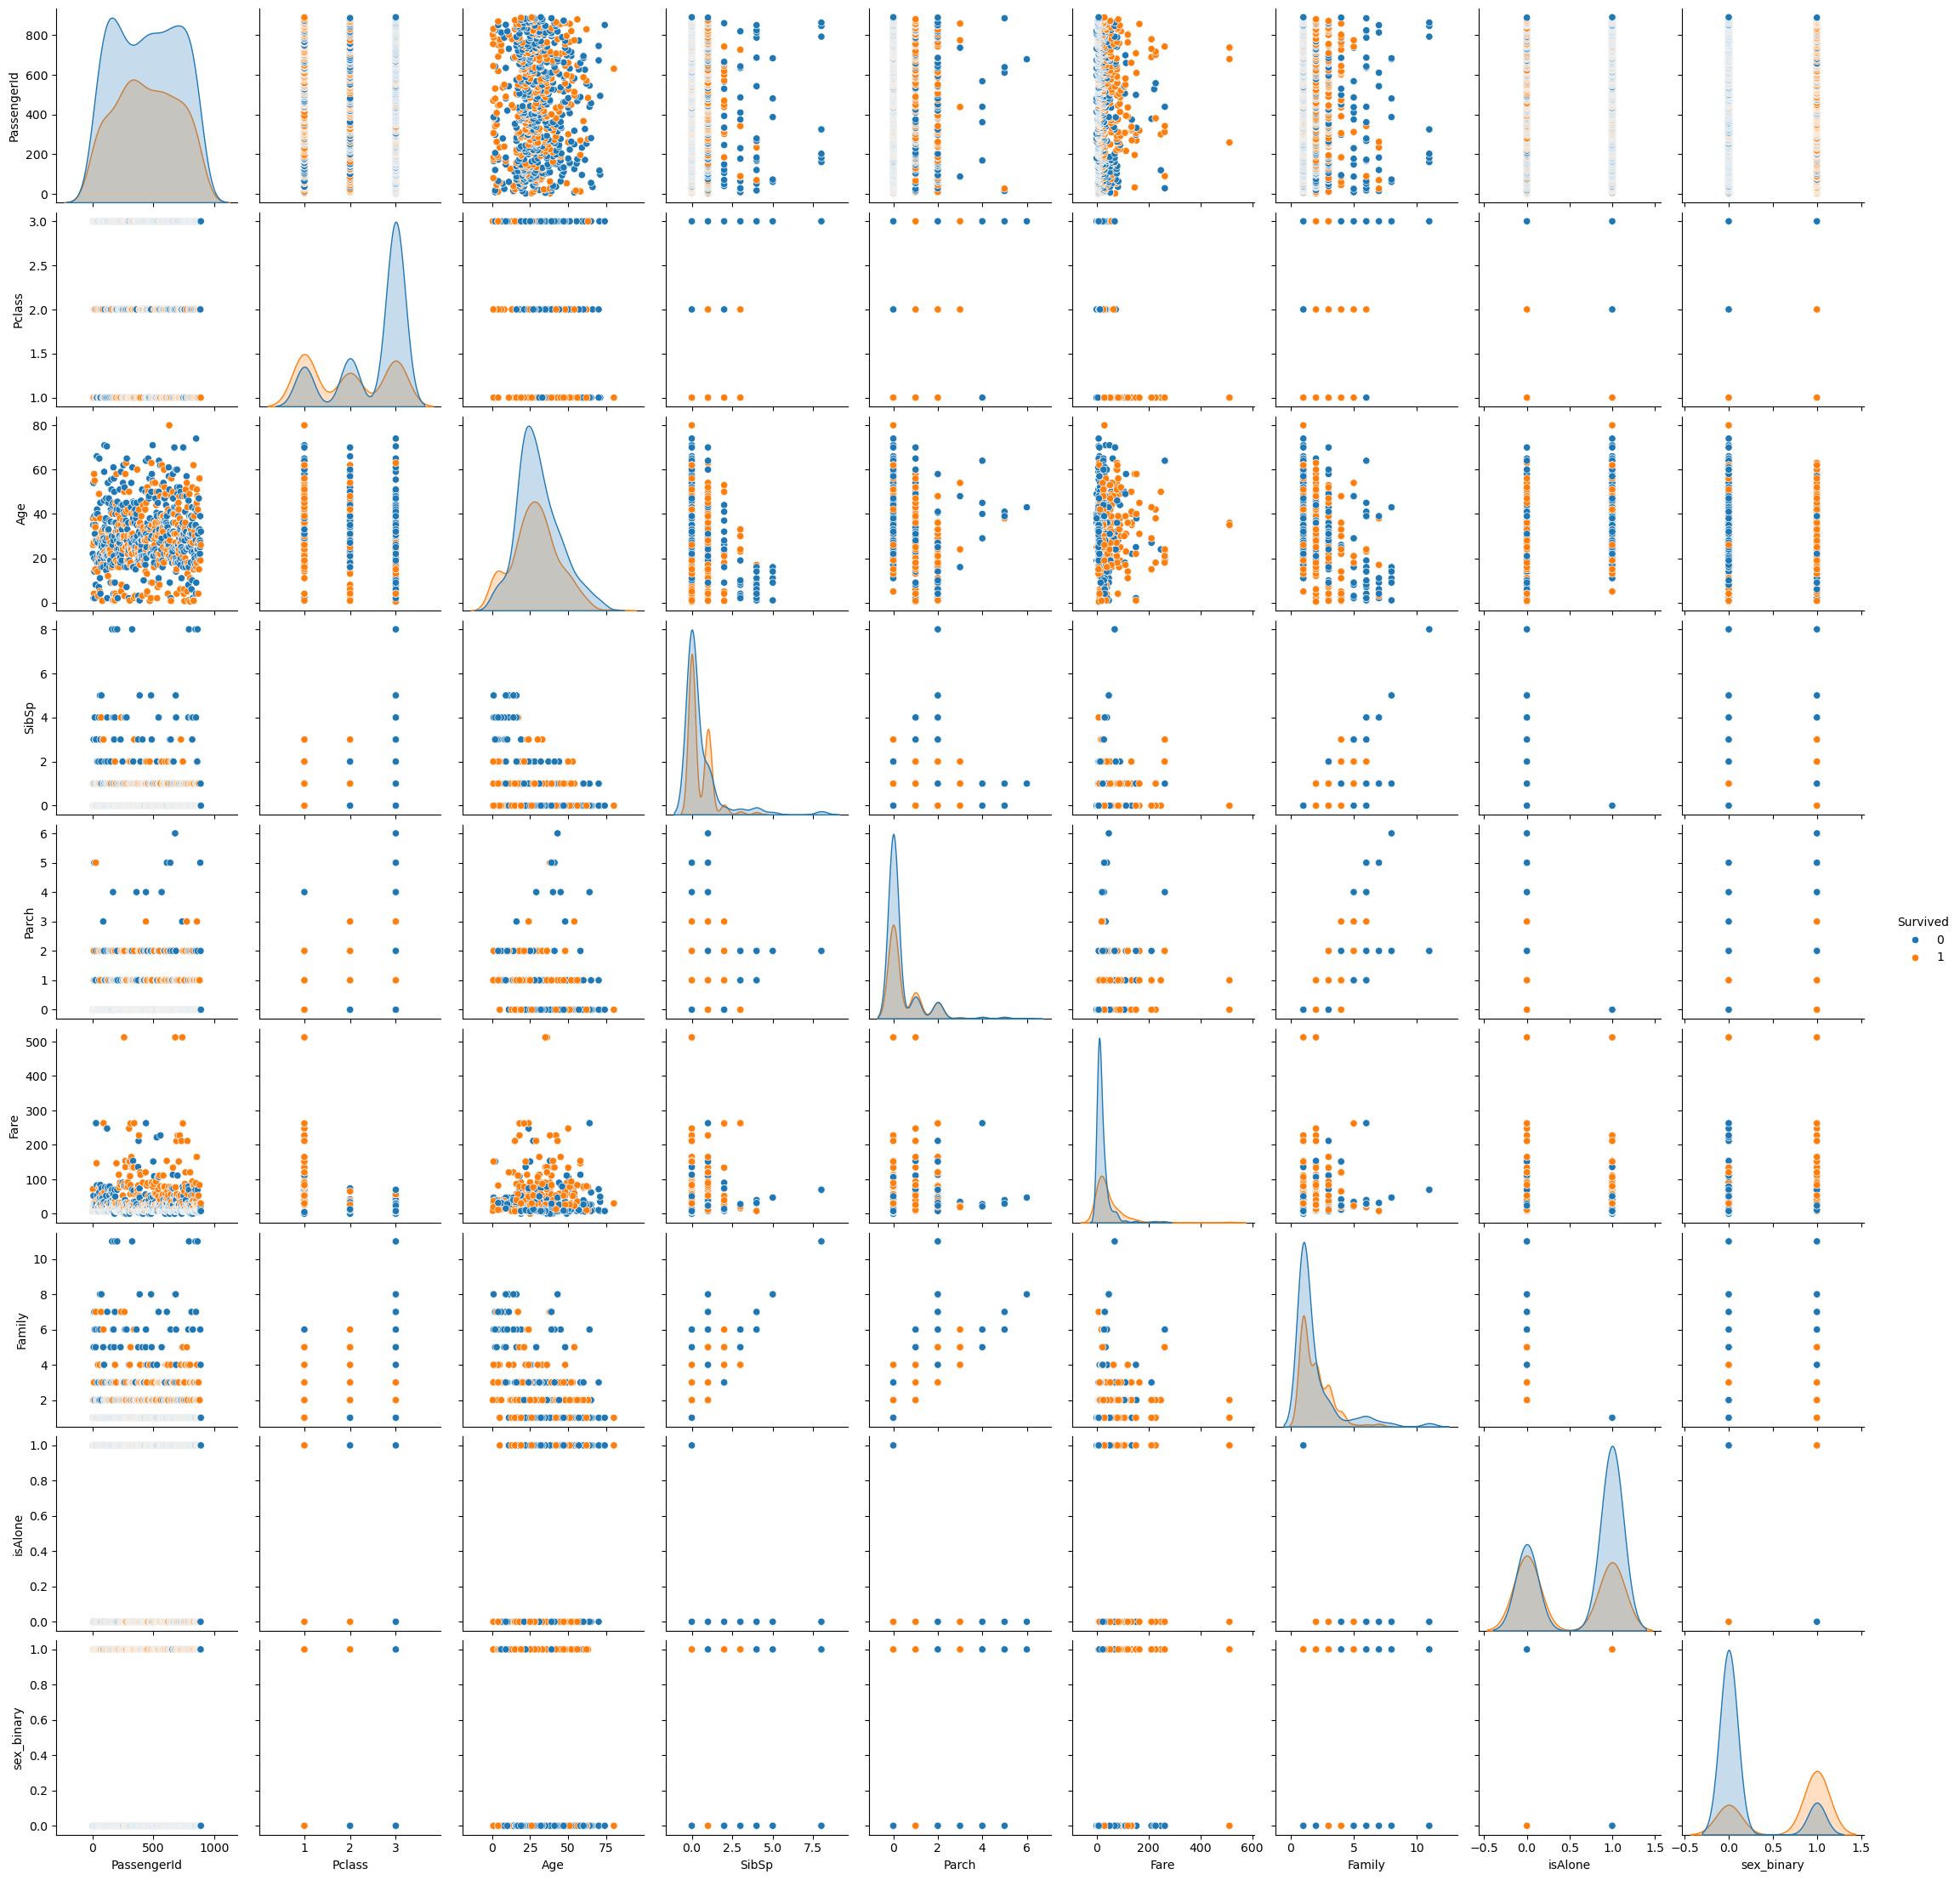

In [21]:
sns.pairplot(train, hue='Survived')

In [22]:
num_cols = ['Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare',  'Family', 'isAlone',
       'sex_binary']
num_cols

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Family',
 'isAlone',
 'sex_binary']

In [23]:
train[num_cols].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,isAlone,sex_binary
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,-0.203367,0.543351
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,0.135207,-0.131900
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.198270,-0.093254
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,-0.584471,0.114631
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,-0.583398,0.245489
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,-0.271832,0.182333
Family,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,-0.690922,0.200988
isAlone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.303646
sex_binary,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.200988,-0.303646,1.000000


<Axes: >

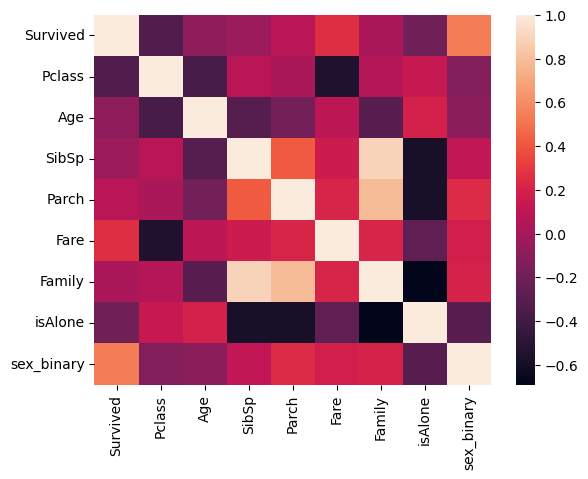

In [24]:
sns.heatmap(train[num_cols].corr())

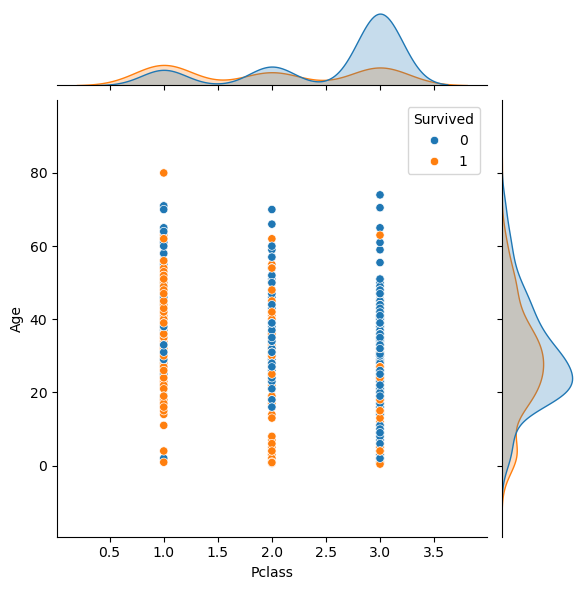

In [25]:
sns.jointplot(train,x='Pclass',y='Age', hue='Survived')
#            -> sns의 형식, data, x, y, hue 등등...

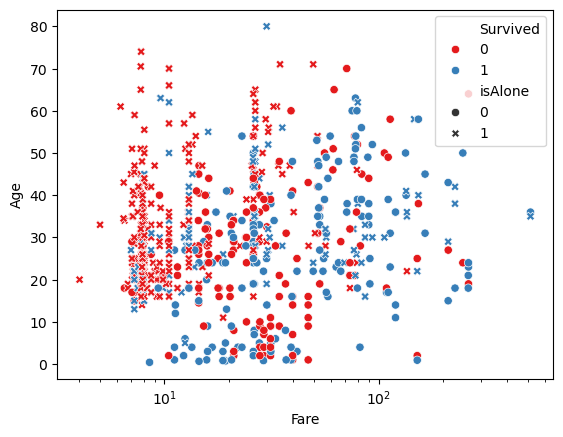

In [26]:
# Age 와 Fare
sns.scatterplot(train, x='Fare', y='Age', hue='Survived', style='isAlone', palette='Set1')
plt.xscale('log')
plt.show()

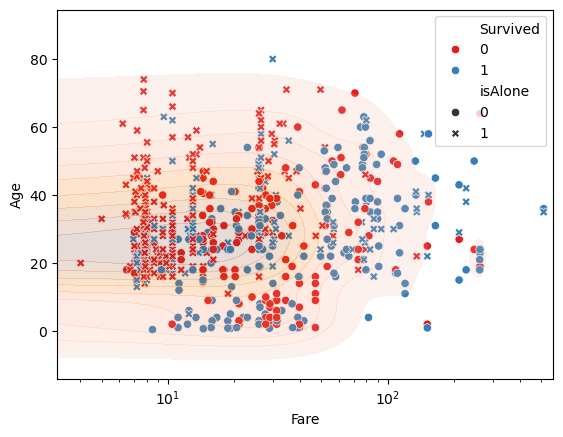

In [27]:
# Age 와 Fare
sns.scatterplot(train, x='Fare', y='Age', hue='Survived', style='isAlone', palette='Set1')
sns.kdeplot(train, x='Fare', y='Age', fill=True, alpha=0.2)
plt.xscale('log')
plt.show()

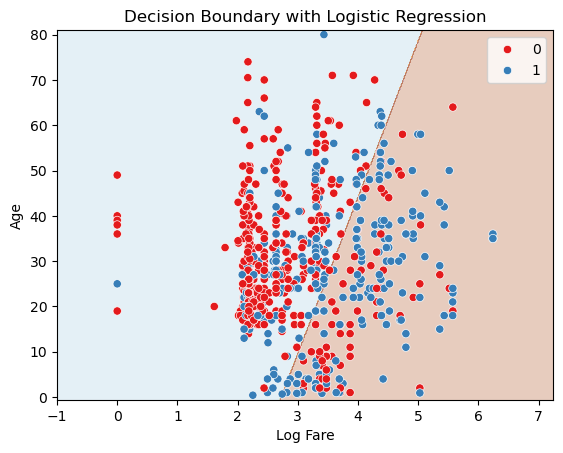

In [28]:
## 요거는 그냥 붙여넣어서 봅시다.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 준비
X = np.column_stack((np.log(train['Fare'].values + 1), train['Age'].values))  # Fare와 Age를 특징으로 사용
y = train['Survived'].values  # 목표 변수 (생존 여부)

# NaN 값이 있는 행 제거
mask = ~np.isnan(X).any(axis=1)
X = X[mask]
y = y[mask]


# 데이터 분할 (훈련 및 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 결정 경계 그리기 위한 메쉬 그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 예측 값으로 결정 경계 시각화
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# 원래의 데이터와 생존 여부 시각화
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1')

plt.xlabel('Log Fare')
plt.ylabel('Age')
plt.title('Decision Boundary with Logistic Regression')

plt.show()
